# Import Libraries


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<Figure size 640x480 with 0 Axes>

# Load Dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Project Based Internship/Rakamin PBI/IDX Maret - Data Science/loan_data_2007_2014.csv")
dataset = pd.read_csv("/content/drive/MyDrive/Project Based Internship/Rakamin PBI/IDX Maret - Data Science/loan_data_2007_2014.csv")

In [3]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

## Features Interpretation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

| Nama Kolom | Penjelasan |
|------------|-----------|
| id | ID unik yang ditetapkan LC untuk daftar pinjaman. |
| member_id | ID unik yang ditetapkan LC untuk anggota peminjam. |
| loan_amnt | Jumlah total pinjaman yang diminta oleh peminjam. |
| funded_amnt | Jumlah total yang didanai untuk pinjaman tersebut. |
| funded_amnt_inv | Jumlah total yang didanai oleh investor untuk pinjaman tersebut. |
| term | Jumlah pembayaran pinjaman dalam bulan, dapat berupa 36 atau 60 bulan. |
| int_rate | Suku bunga pinjaman. |
| installment | Pembayaran bulanan yang harus dibayar oleh peminjam jika pinjaman itu berasal. |
| grade | Tingkat pinjaman yang ditetapkan oleh LC. |
| sub_grade | Sub-kategori tingkat pinjaman yang ditetapkan oleh LC. |
| emp_title | Jabatan yang diberikan oleh peminjam saat mengajukan pinjaman. |
| emp_length | Lamanya masa kerja dalam tahun, berkisar antara 0 hingga 10 tahun atau lebih. |
| home_ownership | Status kepemilikan rumah peminjam: SEWA, SENDIRI, KPR, atau LAINNYA. |
| annual_inc | Pendapatan tahunan yang dilaporkan sendiri oleh peminjam saat pendaftaran. |
| verification_status | Status verifikasi pendapatan peminjam oleh LC. |
| issue_d | Bulan dimana pinjaman didanai. |
| loan_status | Status pinjaman saat ini. |
| pymnt_plan | Menunjukkan apakah rencana pembayaran telah diterapkan untuk pinjaman. |
| url | URL untuk halaman LC dengan data daftar pinjaman. |
| desc | Deskripsi pinjaman yang diberikan oleh peminjam. |
| purpose | Kategori yang disediakan oleh peminjam untuk permintaan pinjaman. |
| title | Judul pinjaman yang diberikan oleh peminjam. |
| zip_code | 3 angka pertama kode pos yang diberikan peminjam dalam permohonan pinjaman. |
| addr_state | Negara bagian yang disediakan oleh peminjam dalam permohonan pinjaman. |
| dti | Rasio hutang terhadap pendapatan peminjam. |
| delinq_2yrs | Jumlah tunggakan lebih dari 30 hari dalam 2 tahun terakhir. |
| earliest_cr_line | Bulan dimana batas kredit peminjam yang paling awal dilaporkan dibuka. |
| inq_last_6mths | Jumlah pertanyaan kredit dalam 6 bulan terakhir (tidak termasuk otomotif dan hipotek). |
| mths_since_last_delinq | Jumlah bulan sejak tunggakan terakhir peminjam. |
| mths_since_last_record | Jumlah bulan sejak pencatatan publik terakhir. |
| open_acc | Jumlah jalur kredit terbuka dalam arsip kredit peminjam. |
| pub_rec | Jumlah catatan publik yang menghina dalam arsip kredit peminjam. |
| revol_bal | Total saldo kredit bergulir peminjam. |
| revol_util | Tingkat pemanfaatan jalur kredit bergulir oleh peminjam. |
| total_acc | Jumlah total batas kredit yang saat ini ada dalam arsip kredit peminjam. |
| initial_list_status | Status pencatatan awal pinjaman: Whole atau Fractional. |
| out_prncp | Sisa pokok terutang untuk jumlah total yang didanai. |
| out_prncp_inv | Sisa pokok terutang untuk bagian yang didanai oleh investor. |
| total_pymnt | Jumlah pembayaran yang telah diterima hingga saat ini. |
| total_pymnt_inv | Jumlah pembayaran yang diterima hingga saat ini dari investor. |
| total_rec_prncp | Total pokok yang telah diterima hingga saat ini. |
| total_rec_int | Total bunga yang telah diterima hingga saat ini. |
| total_rec_late_fee | Total biaya keterlambatan yang diterima hingga saat ini. |
| recoveries | Jumlah pemulihan dana dari akun yang bermasalah. |
| collection_recovery_fee | Biaya pemulihan koleksi setelah pinjaman gagal bayar. |
| last_pymnt_d | Bulan terakhir pembayaran diterima. |
| last_pymnt_amnt | Jumlah total pembayaran terakhir yang diterima. |
| next_pymnt_d | Tanggal pembayaran terjadwal berikutnya. |
| last_credit_pull_d | Bulan terakhir LC menarik kredit untuk pinjaman ini. |
| collections_12_mths_ex_med | Jumlah koleksi dalam 12 bulan terakhir tidak termasuk koleksi medis. |
| mths_since_last_major_derog | Jumlah bulan sejak rating buruk 90 hari terakhir atau lebih buruk. |
| policy_code | Kode kebijakan, 1 untuk publik dan 2 untuk produk baru yang tidak tersedia untuk umum. |
| application_type | Jenis aplikasi pinjaman: Individual atau Joint. |
| acc_now_delinq | Jumlah rekening dimana peminjam sedang menunggak. |
| tot_coll_amt | Total jumlah koleksi yang pernah terutang. |
| tot_cur_bal | Total saldo saat ini dari semua akun. |
| total_rev_hi_lim | Total batas kredit tertinggi dari akun bergulir peminjam. |


Dataset yang digunakan di sini berisi data historis pinjaman selama 7 tahun yang diambil dari LendingClub. Dengan melihat status pinjaman, kita dapat memeriksa apakah pinjaman disetujui untuk pelanggan atau tidak. Jika status pinjaman adalah "charged off", "default", atau jika pencairan pinjaman mengalami keterlambatan selama 31-120 hari, maka pinjaman tersebut dianggap sebagai pinjaman bermasalah (bad loan).

Kita akan menganalisis karakteristik pelanggan yang termasuk dalam kategori pinjaman bermasalah dan membangun Model Probabilitas Gagal Bayar. Model ini nantinya dapat digunakan untuk memprediksi apakah seorang pelanggan berisiko gagal bayar atau tidak di masa mendatang.

## Statistic Descriptive of Data

In [5]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


Dataset ini berisi 466.285 entri dengan berbagai variabel terkait pinjaman yang diberikan oleh LendingClub selama 7 tahun. Dari hasil statistik deskriptif, terdapat beberapa insight utama:

Rata-rata jumlah pinjaman yang diberikan (loan_amnt) adalah sekitar 14.317 USD, dengan jumlah pendanaan yang hampir sama. Nilai pinjaman ini memiliki variasi yang cukup besar, dengan minimum 500 USD dan maksimum 35.000 USD. Suku bunga pinjaman (int_rate) bervariasi antara 5,42% hingga 26,06%, dengan rata-rata 13,83%, menunjukkan bahwa beberapa peminjam memiliki risiko yang lebih tinggi.

Jumlah cicilan bulanan (installment) memiliki rata-rata 432,06 USD, tetapi berkisar dari 15,67 USD hingga 1.409,99 USD, tergantung pada besar pinjaman dan suku bunga. Pendapatan tahunan peminjam (annual_inc) bervariasi secara signifikan, dengan median sekitar 63.000 USD, tetapi terdapat peminjam dengan pendapatan hingga 7,5 juta USD, yang mungkin disebabkan oleh outlier.

Rasio utang terhadap pendapatan (dti) rata-rata 17,22%, yang menunjukkan bahwa secara umum, peminjam mengalokasikan sebagian besar pendapatannya untuk membayar utang. Namun, terdapat peminjam dengan DTI mencapai 39,99%, yang menunjukkan risiko gagal bayar lebih tinggi.

Variabel lain yang menarik adalah jumlah akun kredit terbuka (open_acc) yang memiliki median 10 akun, dan total akun kredit (total_acc) rata-rata 25 akun, menunjukkan bahwa sebagian besar peminjam memiliki riwayat kredit yang cukup panjang. Penggunaan kredit bergulir (revol_util) rata-rata 56,18%, yang menunjukkan bahwa banyak peminjam memanfaatkan lebih dari separuh batas kredit mereka.

Dari sisi pembayaran, rata-rata jumlah yang telah dibayarkan (total_pymnt) adalah 11.540 USD, tetapi berkisar dari 0 hingga 57.777 USD, menunjukkan bahwa ada peminjam yang melunasi pinjaman sepenuhnya, sementara yang lain gagal membayar. Pemulihan pinjaman (recoveries) menunjukkan adanya kasus gagal bayar dengan jumlah pemulihan hingga 33.520 USD, menunjukkan bahwa LendingClub mengalami kerugian dari beberapa pinjaman yang tidak terbayar.

Selain itu, beberapa kolom seperti annual_inc_joint, dti_joint, dan verification_status_joint tidak memiliki nilai (semua NaN), yang berarti data ini tidak tersedia dalam dataset ini. Beberapa variabel lain seperti mths_since_last_delinq dan mths_since_last_record juga memiliki jumlah nilai non-null yang jauh lebih rendah, menunjukkan bahwa tidak semua peminjam memiliki riwayat keterlambatan pembayaran atau catatan buruk sebelumnya.

Secara keseluruhan, dataset ini menunjukkan variasi yang besar dalam karakteristik peminjam dan status pinjaman mereka. Dengan menganalisis pola dalam data ini, dapat dikembangkan model untuk memprediksi kemungkinan gagal bayar di masa mendatang.

# Assign Target Column

Mengklasifikasikan status akhir pinjaman sebagai berikut:

Pinjaman berisiko / pinjaman buruk = ["Charged Off" (Dihapuskan), "Late (31-120 days)" (Terlambat 31-120 hari), "Late (16-30 days)" (Terlambat 16-30 hari), "Default" (Gagal Bayar), "Does not meet the credit policy. Status: Charged Off" (Tidak memenuhi kebijakan kredit - Dihapuskan)].

In [6]:
data['bad_loan'] = np.where(data['loan_status'].isin(['Charged Off','Default','Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 1, 0)

data[['loan_status','bad_loan']].head()

,loan_status,bad_loan
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0


# Data Preprocessing

## Dropping Unecessary Columns

### Drop Identifiers

Fitur-fitur berikut merupakan pengidentifikasi dan tidak dapat digunakan dalam pembangunan model:

Unnamed: 0, id, member_id, url, title, desc, zip_code, dan emp_title.

In [7]:
data.drop(columns=['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'desc', 'zip_code' ,'emp_title'],inplace=True)

### Drop Columns

Menghapus kolom dengan missing values > 50%

In [8]:
na_col = data.isna().mean()
na_col[na_col >0.5]

,0
mths_since_last_delinq,0.536906
mths_since_last_record,0.865666
mths_since_last_major_derog,0.787739
annual_inc_joint,1.000000
dti_joint,1.000000
verification_status_joint,1.000000
open_acc_6m,1.000000
open_il_6m,1.000000
open_il_12m,1.000000
open_il_24m,1.000000


Menghapus kolom dengan < 2 nilai unik

In [9]:
data.nunique()[(data.nunique()<2) | (data.nunique() == len(data))]

,0
policy_code,1
application_type,1
annual_inc_joint,0
dti_joint,0
verification_status_joint,0
open_acc_6m,0
open_il_6m,0
open_il_12m,0
open_il_24m,0
mths_since_rcnt_il,0


In [10]:
del_col = list(data.nunique()[(data.nunique()<2) | (data.nunique() == len(data))].index)
na_col = list(na_col[na_col >0.5].index)
cols = set(del_col + na_col)

data.drop(cols,axis=1,inplace=True)
data.shape

(466285, 46)

### Data Understanding

Kita ingin memprediksi apakah pemberian pinjaman berisiko atau tidak sebelum investasi dilakukan, bukan setelahnya.

Masalah dalam dataset ini adalah adanya beberapa fitur/kolom yang terkait dengan status pinjaman saat ini. Oleh karena itu, kolom-kolom ini perlu dihapus dari dataset agar tidak memengaruhi model prediksi.

Kolom yang terkait dengan status pinjaman setelah diterbitkan dan akan dihapus:

issue_d, loan_status, pymnt_plan, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d

Selain itu, kolom sub_grade juga akan dihapus karena mengandung informasi yang sama dengan kolom grade.

Kolom funded_amnt dan funded_amnt_inv juga akan dihapus karena memiliki informasi yang sama dengan kolom loan_amnt.

In [11]:
drop_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d','sub_grade','funded_amnt','funded_amnt_inv']

data.drop(drop_col,axis=1,inplace=True)
data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,...,13648,83.7,9.0,f,0.0,0.0,NaN,NaN,NaN,0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,...,1687,9.4,4.0,f,0.0,0.0,NaN,NaN,NaN,1
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,...,2956,98.5,10.0,f,0.0,0.0,NaN,NaN,NaN,0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,...,5598,21.0,37.0,f,0.0,0.0,NaN,NaN,NaN,0
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,...,27783,53.9,38.0,f,0.0,0.0,NaN,NaN,NaN,0


## Handling Missing Values

In [12]:
data.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,21008
home_ownership,0
annual_inc,4
verification_status,0
purpose,0


In [13]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'bad_loan'],
      dtype='object')

In [14]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [15]:
dataset[data['emp_length'].isnull()][['emp_length','emp_title']]

,emp_length,emp_title
168,NaN,NaN
323,NaN,NaN
394,NaN,NaN
422,NaN,NaN
439,NaN,NaN
...,...,...
466254,NaN,NaN
466256,NaN,NaN
466262,NaN,NaN
466265,NaN,NaN


In [16]:
# Mengonversi kolom emp_length ke dalam format numerik
# dan mengganti nilai NaN dengan 0, serta mengganti "< 1 year" menjadi 0.5 tahun.

data['emp_length'] = data['emp_length'].str.replace('years', '', regex=True).str.replace('year', '', regex=True).str.strip().str.replace('< 1', '0.5', regex=True).str.strip('+')

data['emp_length'] = data['emp_length'].astype(float)  # Mengubah tipe data ke float
data['emp_length'] = data['emp_length'].replace(np.nan, 0)  # Mengganti nilai NaN dengan 0

# Mengubah nama kolom agar lebih jelas
data.rename(columns={'emp_length': 'emp_length_years'}, inplace=True)

# Menampilkan kolom emp_length_years setelah konversi
data['emp_length_years']


,emp_length_years
0,10.0
1,0.5
2,10.0
3,10.0
4,1.0
...,...
466280,4.0
466281,10.0
466282,7.0
466283,3.0


In [17]:
data['annual_inc'].mean(),data['annual_inc'].median()

(np.float64(73277.38147046522), 63000.0)

<Axes: ylabel='annual_inc'>

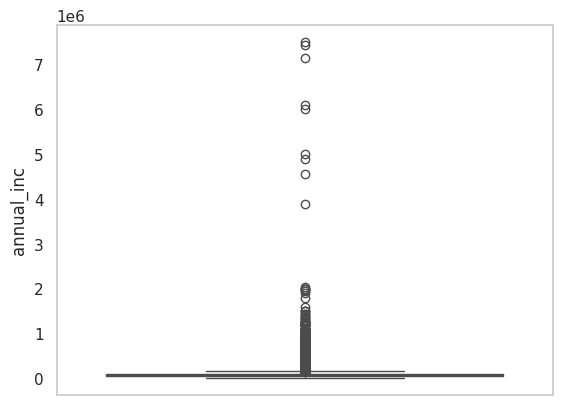

In [18]:
sns.boxplot(data['annual_inc'])

In [19]:
data['annual_inc'] = data['annual_inc'] = data['annual_inc'].fillna(data['annual_inc'].median())

In [20]:
del_rows = data[data['delinq_2yrs'].isnull()].index

data.drop(del_rows,axis=0,inplace=True)

In [21]:
data = data.reset_index(drop=True)

In [22]:
data.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length_years,0
home_ownership,0
annual_inc,0
verification_status,0
purpose,0


In [23]:
data['collections_12_mths_ex_med'].value_counts()

,count
collections_12_mths_ex_med,
0.0,462226
1.0,3665
2.0,219
3.0,19
4.0,7
6.0,1
16.0,1
20.0,1
5.0,1


In [24]:
data['collections_12_mths_ex_med'] = data['collections_12_mths_ex_med'].fillna(0)

In [25]:
data['revol_util'].value_counts()

,count
revol_util,
0.0,2284
58.0,864
53.0,850
59.0,845
61.0,832
...,...
137.8,1
113.9,1
122.5,1


In [26]:
data['revol_util'] = data['revol_util'].fillna(0)

In [27]:
data['tot_coll_amt'].value_counts()

,count
tot_coll_amt,
0.0,346259
50.0,837
100.0,650
75.0,515
200.0,309
...,...
8975.0,1
1597.0,1
7130.0,1


In [28]:
for i in ['tot_coll_amt','total_rev_hi_lim','tot_cur_bal']:
    data[i] = data[i].fillna(0)

In [29]:
missing_data = data.isna().sum()
missing_data[missing_data>0]

,0


Penanganan Nilai Hilang dalam Dataset

1. Penanganan `annual_inc`
Kolom `annual_inc` memiliki nilai yang hilang, sehingga kita mengisinya dengan nilai median. Penggunaan median lebih disarankan dibandingkan rata-rata karena dapat mengurangi dampak dari nilai ekstrem (outlier) dalam distribusi pendapatan.

2. Penghapusan Baris dengan Nilai Kosong yang Sedikit
Beberapa kolom seperti `delinq_2yrs`, `earliest_cr_line`, `inq_last_6mths`, `open_acc`, `pub_rec`, dan `acc_now_delinq` memiliki jumlah nilai kosong yang sangat kecil (hanya 29 baris). Oleh karena itu, daripada mengisi nilai yang hilang, kita menghapus baris-baris tersebut karena jumlahnya tidak signifikan dibandingkan total dataset.

3. Penanganan `collections_12_mths_ex_med`
Kolom ini menunjukkan jumlah koleksi dalam 12 bulan terakhir, di mana mayoritas nilainya adalah 0 (lebih dari 462 ribu entri). Oleh karena itu, nilai yang hilang diisi dengan 0 karena kemungkinan besar pelanggan tersebut tidak memiliki koleksi.

4. Penanganan `revol_util`
Kolom `revol_util` memiliki beberapa nilai kosong, dan ada sejumlah besar entri yang bernilai 0. Oleh karena itu, nilai yang hilang juga diisi dengan 0 untuk mempertahankan konsistensi data.

5. Penanganan `tot_coll_amt`, `total_rev_hi_lim`, dan `tot_cur_bal`
Ketiga kolom ini memiliki nilai kosong yang cukup banyak (sekitar 70 ribu). Mayoritas entri dalam `tot_coll_amt` bernilai 0 (sekitar 346 ribu). Oleh karena itu, semua nilai kosong dalam tiga kolom ini diisi dengan 0 untuk mencerminkan bahwa tidak ada koleksi atau batas kredit yang digunakan dalam kasus-kasus tersebut.

6. Hasil Akhir
Setelah semua nilai hilang diatasi, dataset kini tidak memiliki nilai kosong lagi, sehingga siap digunakan untuk analisis lebih lanjut atau pemodelan.


## Data Types

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466256 non-null  int64  
 1   term                        466256 non-null  object 
 2   int_rate                    466256 non-null  float64
 3   installment                 466256 non-null  float64
 4   grade                       466256 non-null  object 
 5   emp_length_years            466256 non-null  float64
 6   home_ownership              466256 non-null  object 
 7   annual_inc                  466256 non-null  float64
 8   verification_status         466256 non-null  object 
 9   purpose                     466256 non-null  object 
 10  addr_state                  466256 non-null  object 
 11  dti                         466256 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  earliest_cr_li

Beberapa fitur mempunyai tipe data yang tidak sesuai, seperti term, dan earliest_cr_line

In [31]:
data['term'] = data['term'].str.replace('months','').str.strip()
data['term'] = data['term'].astype(object)

In [32]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],format='%b-%y').dt.year
data['earliest_cr_line'] = data['earliest_cr_line'].astype('object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466256 non-null  int64  
 1   term                        466256 non-null  object 
 2   int_rate                    466256 non-null  float64
 3   installment                 466256 non-null  float64
 4   grade                       466256 non-null  object 
 5   emp_length_years            466256 non-null  float64
 6   home_ownership              466256 non-null  object 
 7   annual_inc                  466256 non-null  float64
 8   verification_status         466256 non-null  object 
 9   purpose                     466256 non-null  object 
 10  addr_state                  466256 non-null  object 
 11  dti                         466256 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  earliest_cr_li

# Exploratory Data Analysis (EDA)

## Target Comparison

<Axes: xlabel='bad_loan', ylabel='count'>

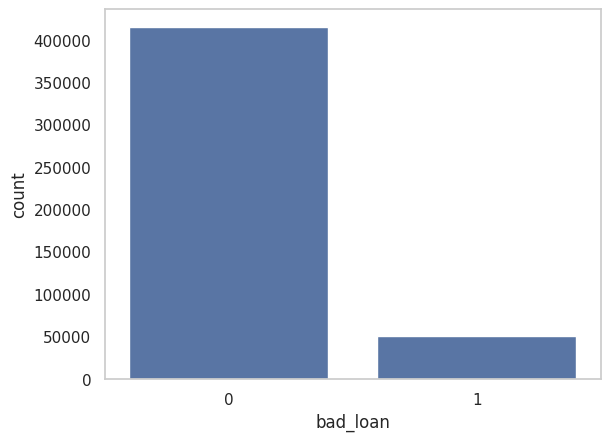

In [34]:
sns.countplot(data,x='bad_loan')

Menyimpan nama fitur numerik, kategorikal, dan target dalam variabel terpisah mempermudah proses Exploratory Data Analysis (EDA).

Fitur numerik: Dikumpulkan berdasarkan tipe data numerik seperti float64, int64, dan int32. Ini mencakup variabel yang berisi nilai angka.

Fitur kategorikal: Dikumpulkan berdasarkan tipe data object, yang biasanya berisi teks atau kategori.

Target: Variabel target yang akan diprediksi dalam analisis, dalam hal ini adalah bad_loan.

Variabel bad_loan dihapus dari daftar fitur numerik untuk memastikan bahwa variabel target tidak digunakan sebagai fitur dalam analisis.

Dengan pendekatan ini, pemisahan fitur berdasarkan jenis datanya akan memudahkan eksplorasi dan pemrosesan lebih lanjut.

In [35]:
numeric_features = list(data.select_dtypes(["float64" , "int64",'int32']).columns)
n = numeric_features.index('bad_loan')
del n

categorical_features = list(data.select_dtypes("object").columns)

target = "bad_loan"

print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['loan_amnt', 'int_rate', 'installment', 'emp_length_years', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'bad_loan']

categorical_features:
['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status']

target:
bad_loan


## Numeric Features Visualization

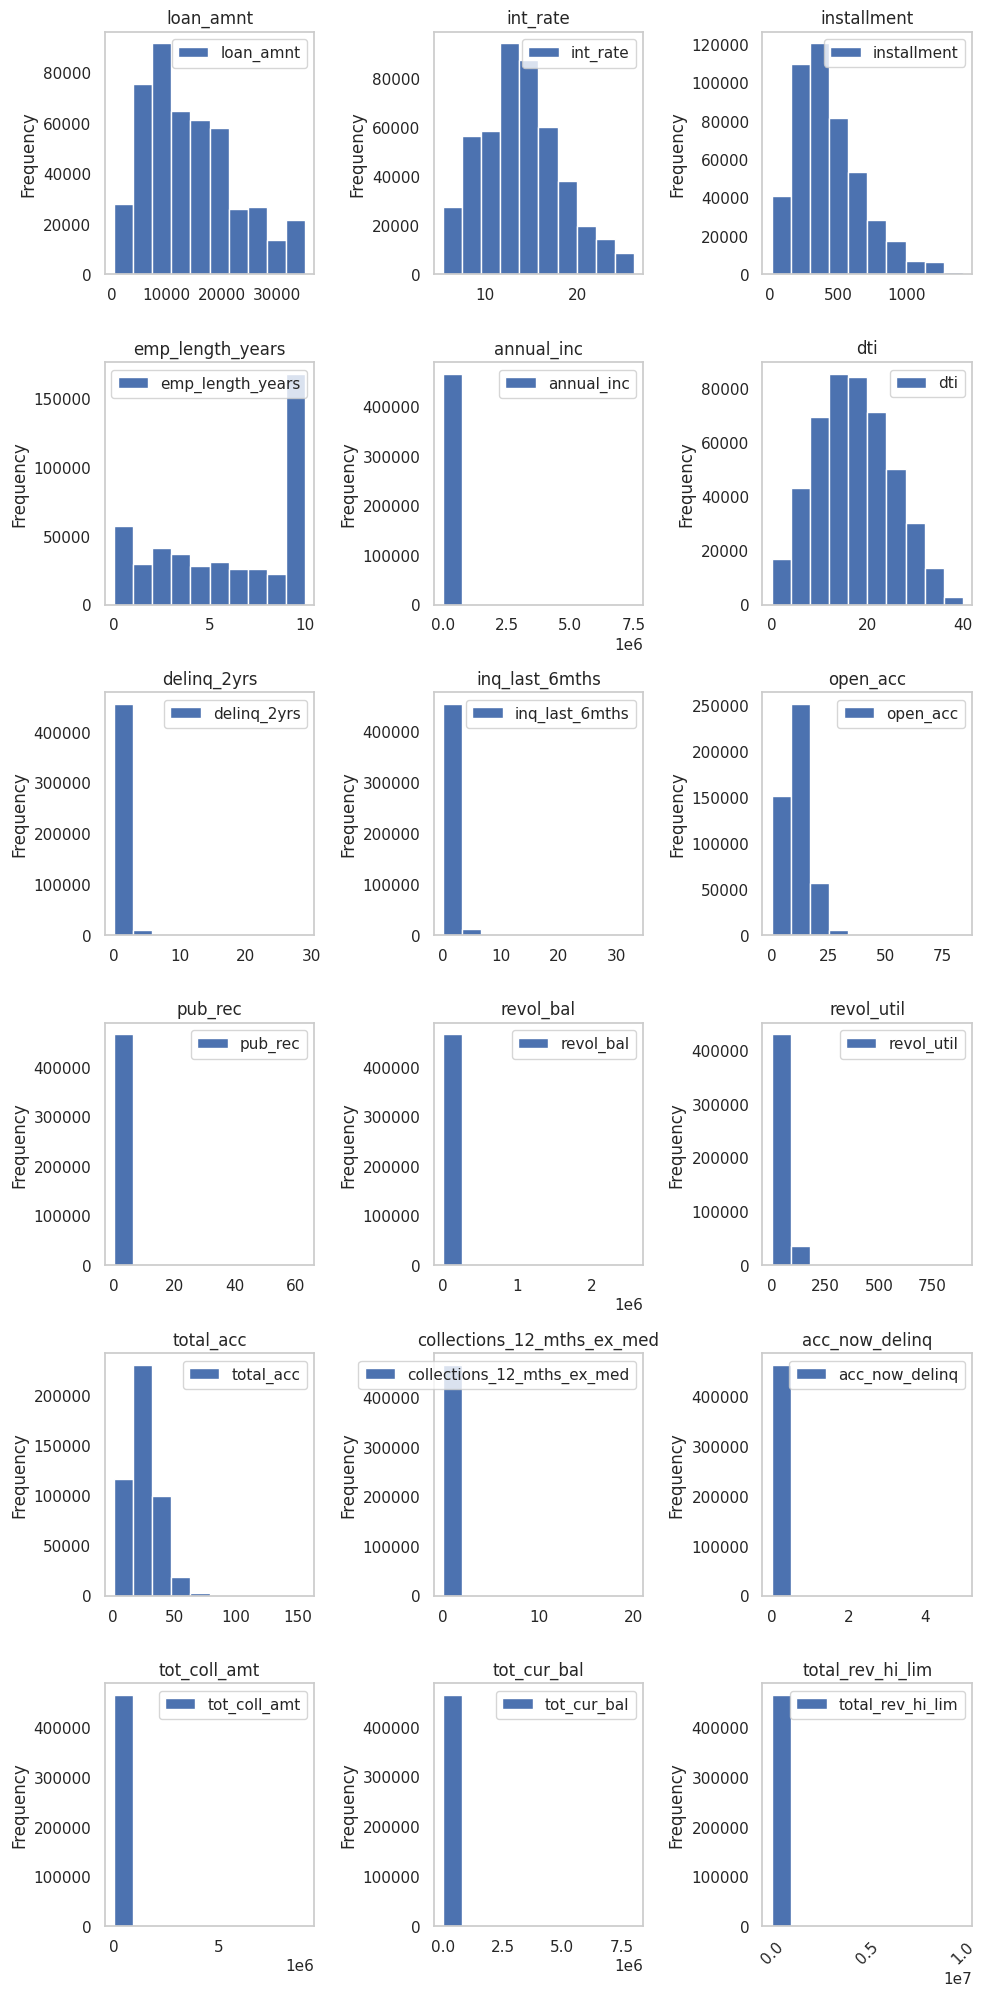

In [36]:
fig,ax = plt.subplots(6,3,figsize=(10,20) ,)
row = col = 0
for n,i in enumerate(numeric_features):

    try:

        if (n%3 == 0) & (n > 0):
            row += 1
            col = 0
        data[i].plot(kind="hist",ax=ax[row,col],legend=target)
        ax[row,col].set_title(i)
        col += 1

    except:
        pass

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

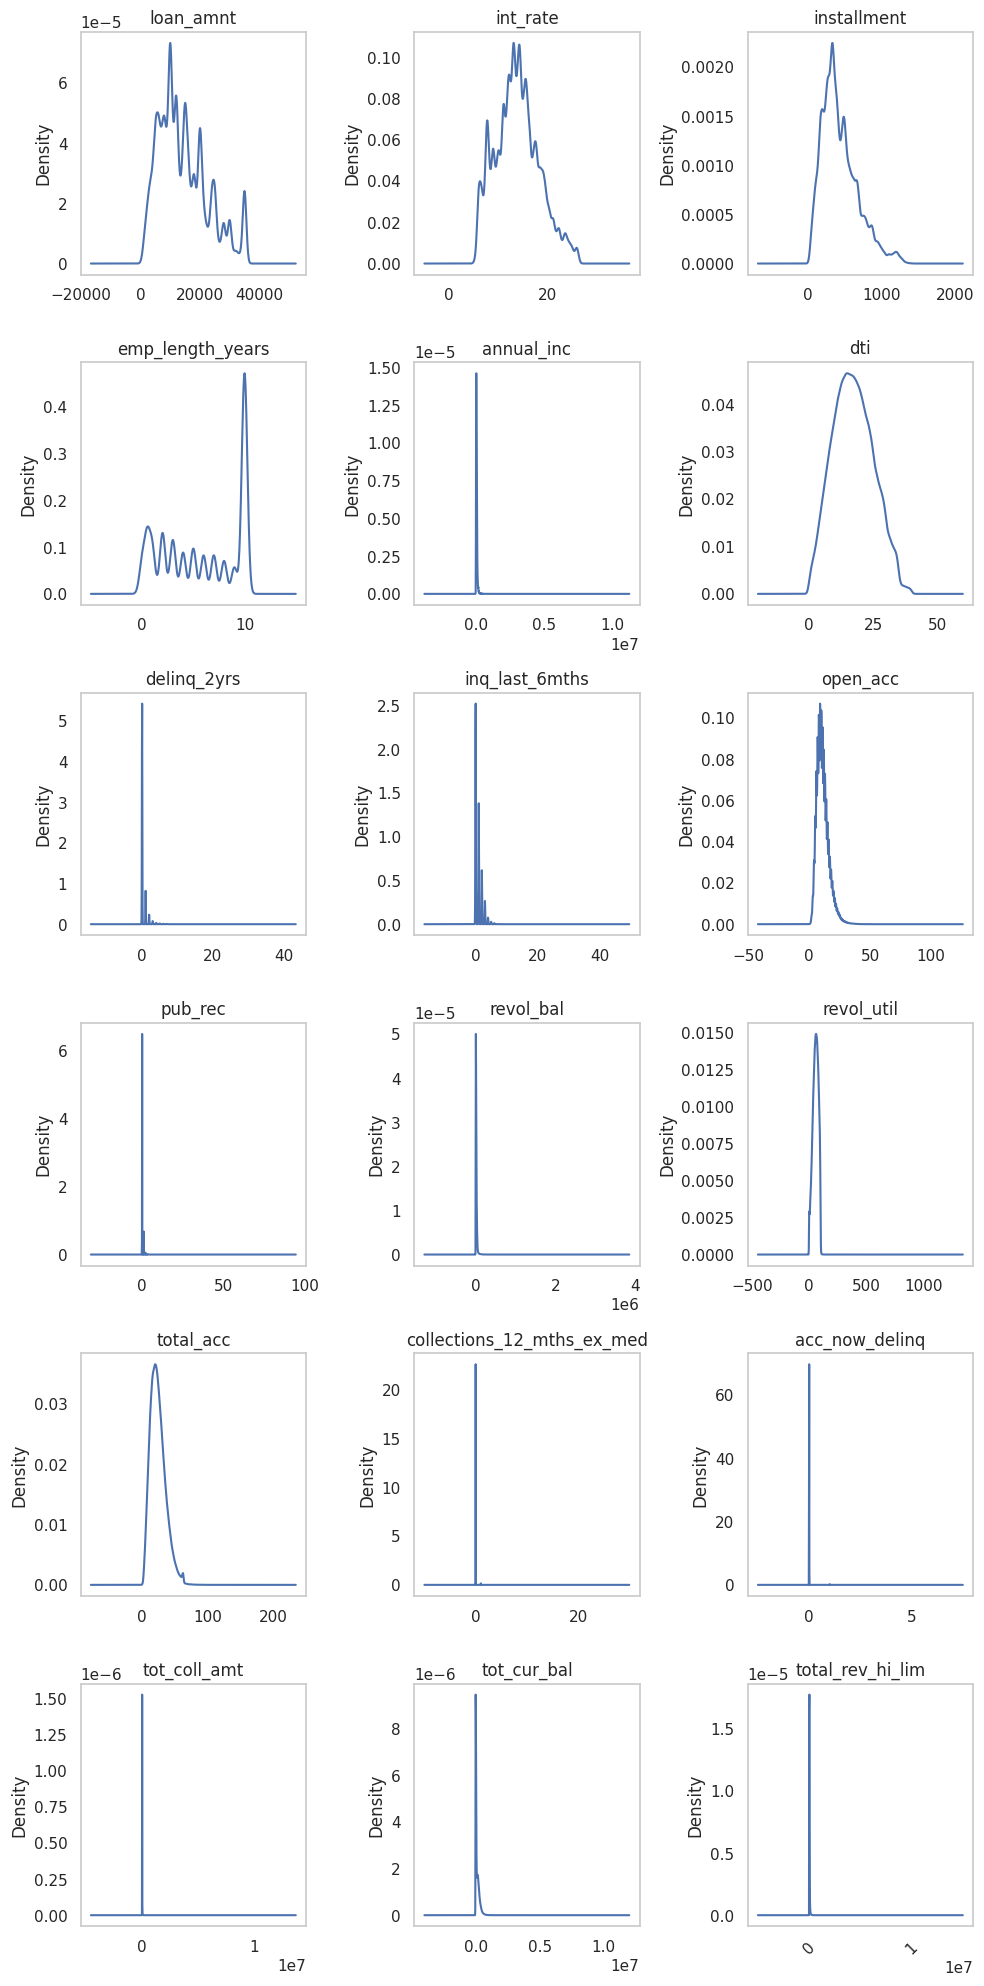

In [37]:
fig,ax = plt.subplots(6,3,figsize=(10,20) ,)
row = col = 0
for n,i in enumerate(numeric_features):

    try:

        if (n%3 == 0) & (n > 0):
            row += 1
            col = 0
        data[i].plot(kind="kde",ax=ax[row,col])
        ax[row,col].set_title(i)
        col += 1

    except:
        pass

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

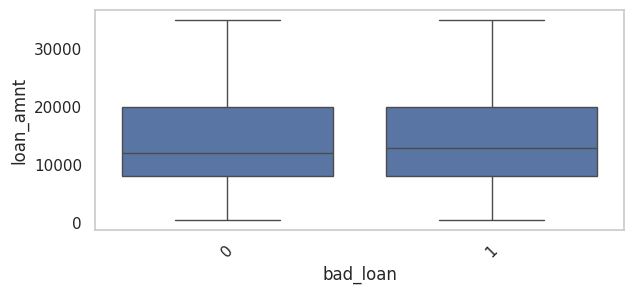

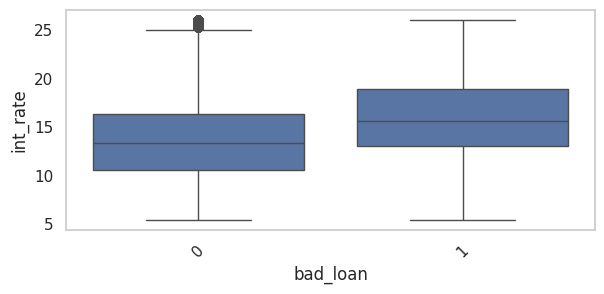

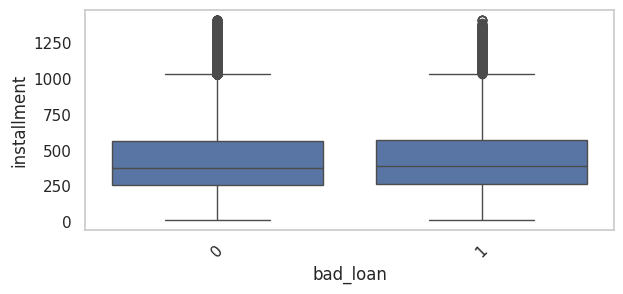

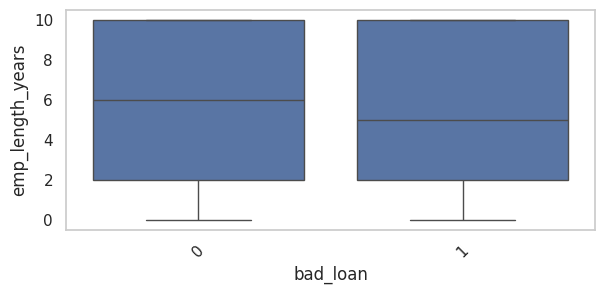

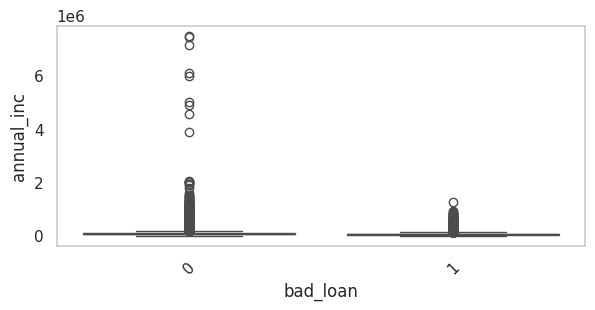

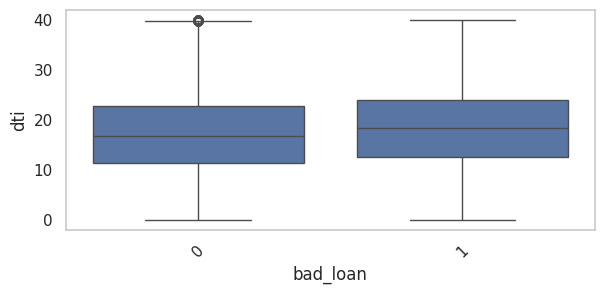

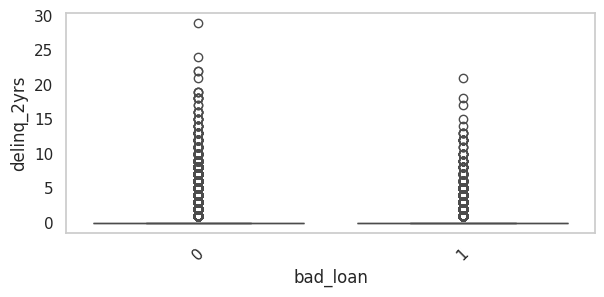

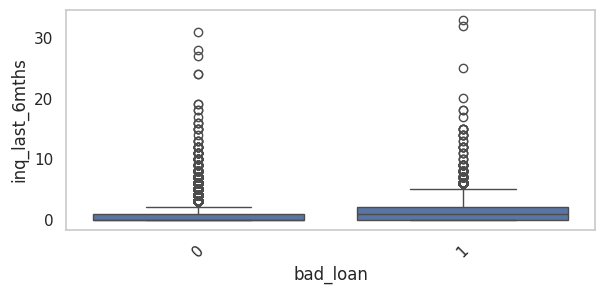

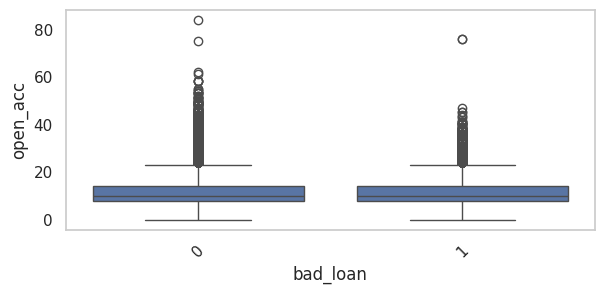

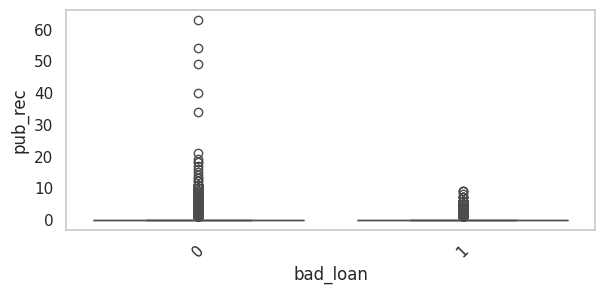

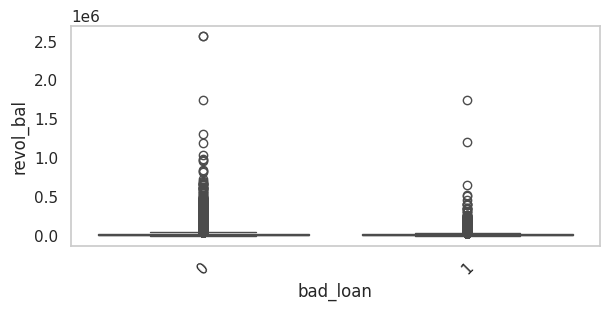

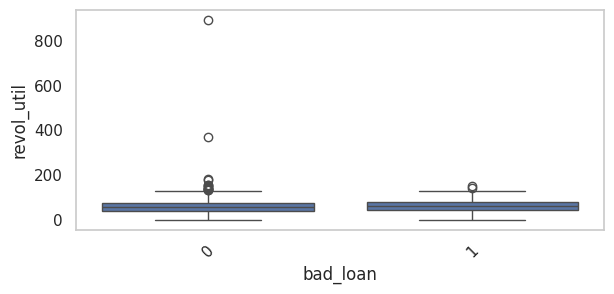

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

In [38]:
for i,f in enumerate(numeric_features):
    try:
        plt.figure(figsize=(15, 20))

        c=i+1

        plt.subplot(6, 2, c)
        g = sns.boxplot(x=data[target],y=data[f])

        g.set_xticklabels(g.get_xticklabels(), rotation=45);
        plt.xticks(rotation=45)
    except:
        pass





fig.tight_layout()
plt.show()

## Categorical Features Visualization

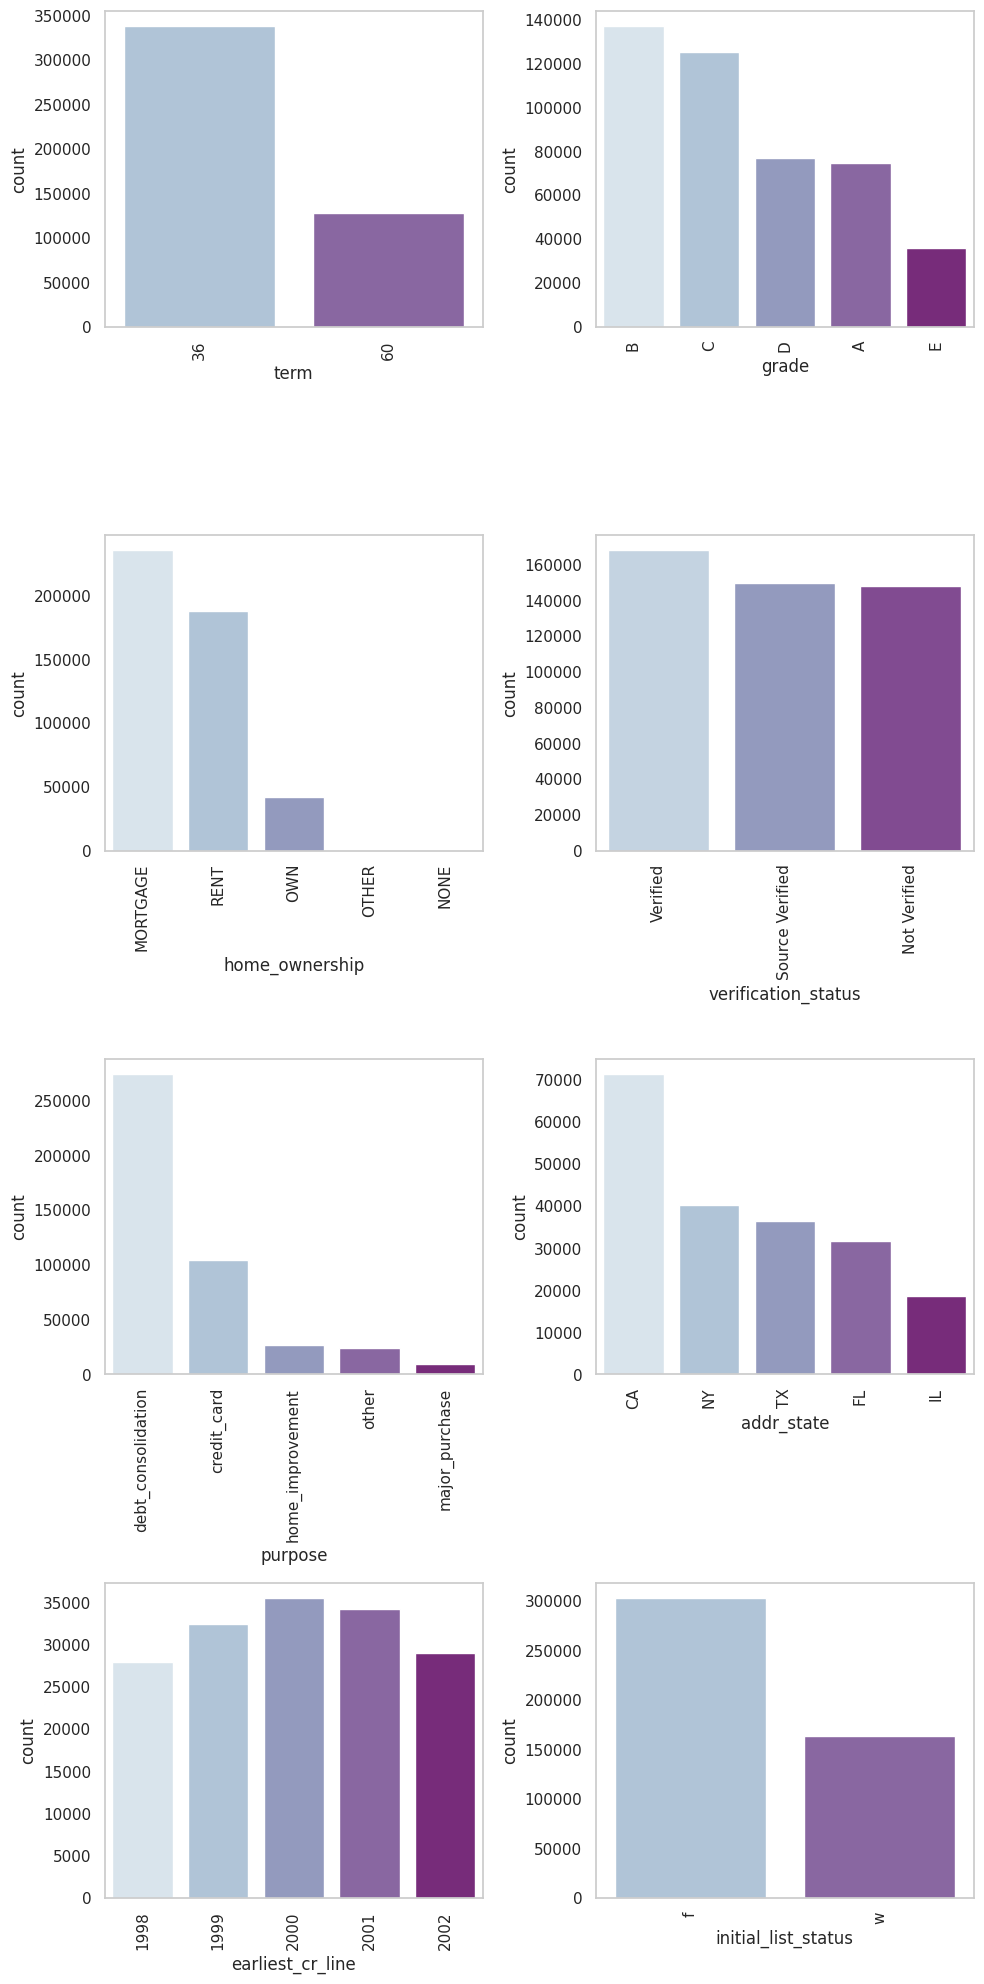

In [39]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

for i, subplots in zip(categorical_features, ax.flatten()):
    g = sns.barplot(x=data[i].value_counts().index[:5], y=data[i].value_counts().values[:5],ax=subplots , palette='BuPu')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set(xlabel=i , ylabel='count')

fig.tight_layout()
plt.show()

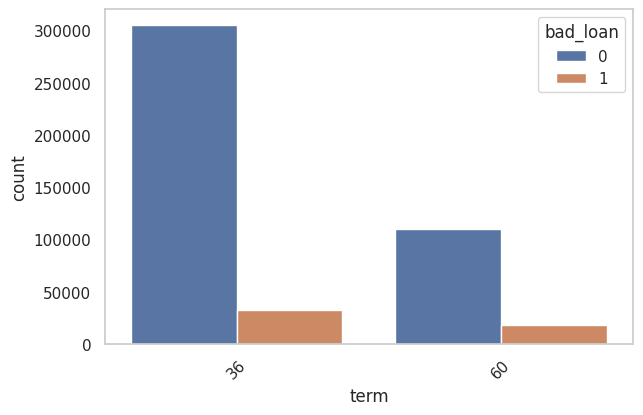

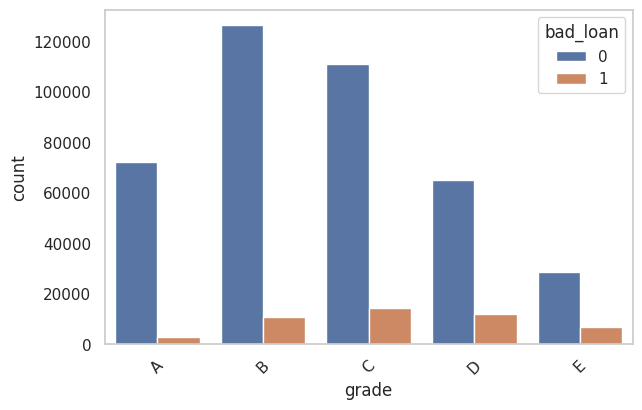

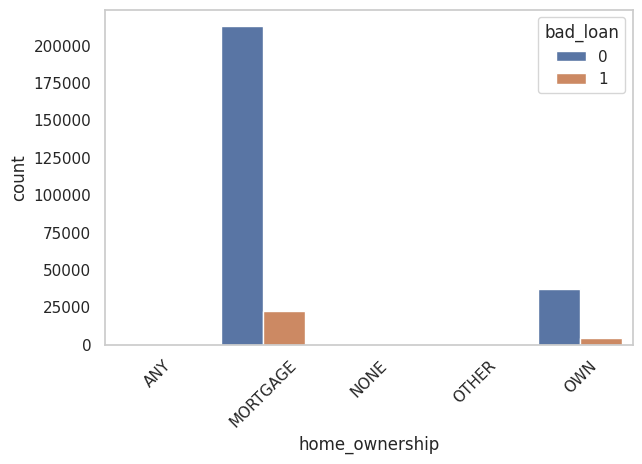

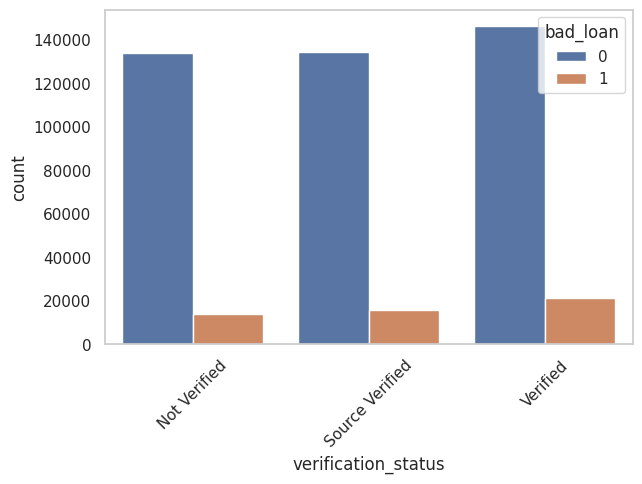

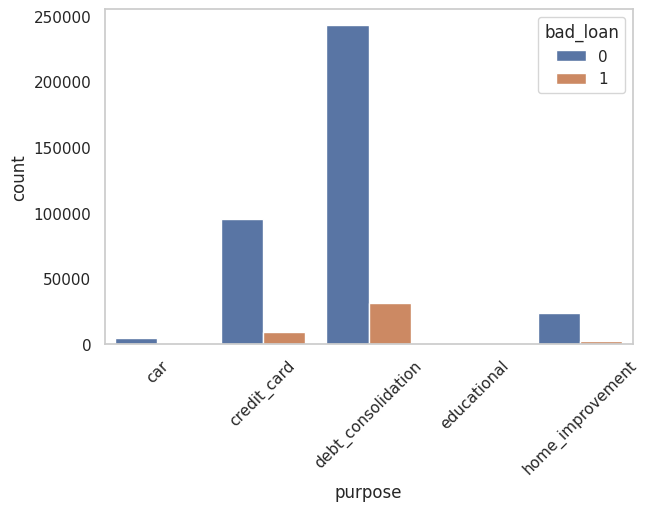

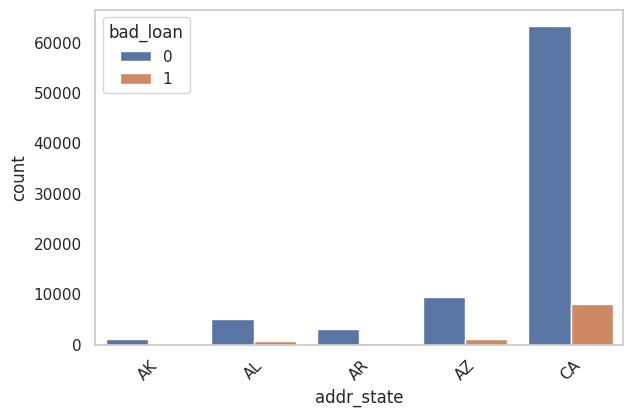

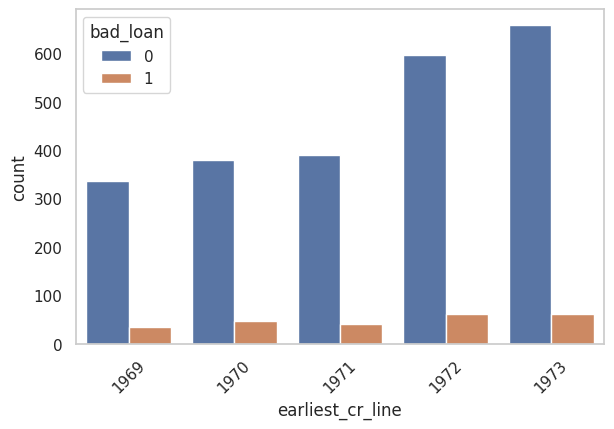

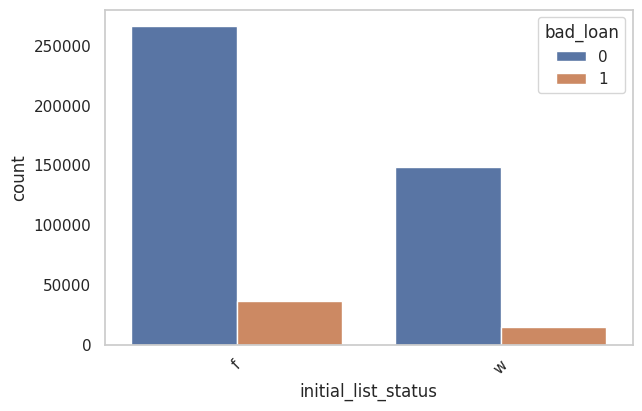

In [40]:
for i,f in enumerate(categorical_features):
    plt.figure(figsize=(15, 20))

    c=i+1

    plt.subplot(4, 2, c)
    a = sorted(data[f].unique().tolist())
    sns.countplot(x=f, data=data, hue=target, order=a[:5])

    g.set_xticklabels(g.get_xticklabels(), rotation=45);
    plt.xticks(rotation=45)

# Feature Selection

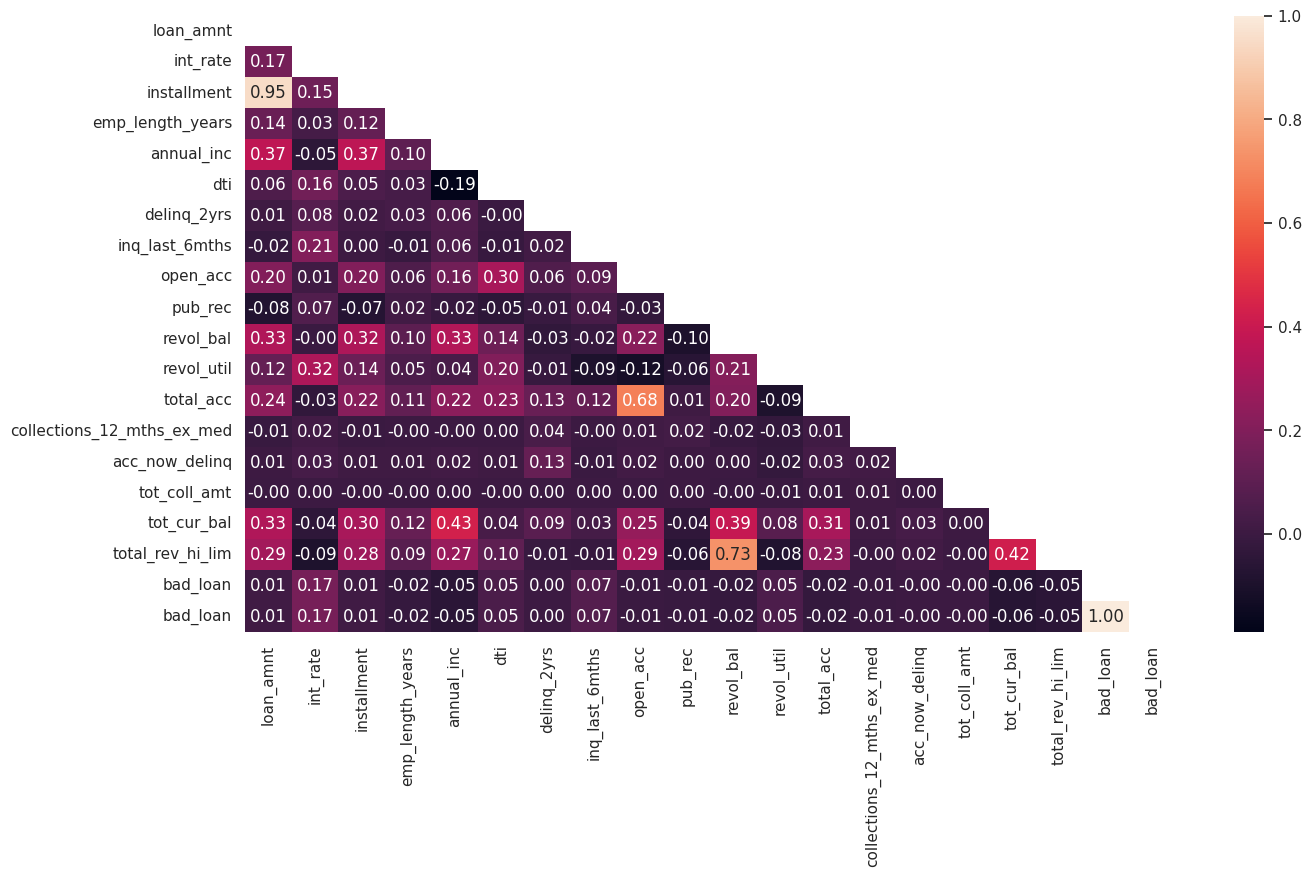

In [42]:
num_tgt = numeric_features.copy()
num_tgt.append(target)
fig = plt.figure(figsize=(15,8))
sns.heatmap(data[num_tgt].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(data[num_tgt].corr(method='pearson')),cbar=True)
plt.show()

Removing Multicolliear Features

In [43]:
data.drop(columns=['loan_amnt','total_acc','revol_bal'],inplace=True)
data.shape

(466256, 24)

In [44]:
cols = data.select_dtypes(["float64" , "int64",'int32']).columns
data[cols].corr()[target]

,bad_loan
int_rate,0.172367
installment,0.013936
emp_length_years,-0.020621
annual_inc,-0.049849
dti,0.048102
delinq_2yrs,0.001227
inq_last_6mths,0.073102
open_acc,-0.006174
pub_rec,-0.009111
revol_util,0.049746


Weight of Evidence (WoE) dan Information Value (IV)

Weight of Evidence (WoE) mengukur kekuatan prediktif dari suatu variabel independen terhadap variabel dependen. Konsep ini berasal dari dunia credit scoring dan digunakan untuk menentukan sejauh mana suatu variabel mampu membedakan antara pelanggan yang baik dan buruk dalam konteks kredit.

Information Value (IV) membantu dalam menentukan variabel mana yang paling berguna dalam prediksi, terutama dalam model regresi logistik. IV mengukur kekuatan prediktif keseluruhan dari suatu variabel dan sangat berguna dalam proses seleksi fitur (feature selection).

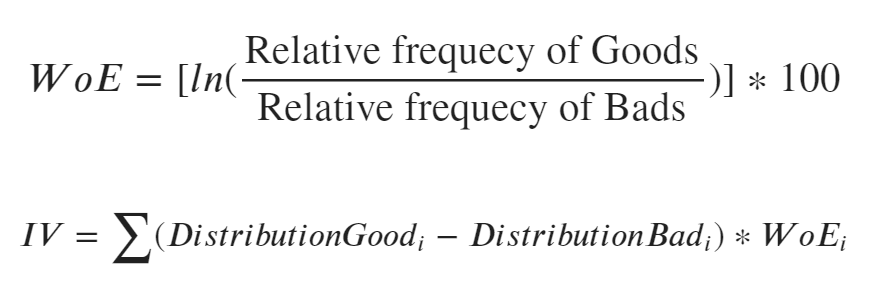

In [45]:
def iv_woe(data, target, bins=10, show_woe=False):

    newData,woeData = pd.DataFrame(), pd.DataFrame()
    cols = data.columns

    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newData=pd.concat([newData,temp], axis=0,ignore_index=True)
        woeData=pd.concat([woeData,d], axis=0,ignore_index=True)

        if show_woe == True:
            print(d)

    return newData, woeData

iv, woe = iv_woe(data, target='bad_loan', bins=20)

Information value of term is 0.038862
Information value of int_rate is 0.330939
Information value of installment is 0.007171
Information value of grade is 0.290812
Information value of emp_length_years is 0.006617
Information value of home_ownership is 0.021686
Information value of annual_inc is 0.055064
Information value of verification_status is 0.020833
Information value of purpose is 0.036988
Information value of addr_state is 0.012537
Information value of dti is 0.026301
Information value of delinq_2yrs is 4.5e-05
Information value of earliest_cr_line is 0.016413
Information value of inq_last_6mths is 0.036971
Information value of open_acc is 0.000743
Information value of pub_rec is 0.00058
Information value of revol_util is 0.027327
Information value of initial_list_status is 0.024804
Information value of collections_12_mths_ex_med is 0.000415
Information value of acc_now_delinq is 5.2e-05
Information value of tot_coll_amt is 0.001586
Information value of tot_cur_bal is 0.05671
I

Dalam analisis credit scoring dan pemodelan risiko kredit, Information Value (IV) digunakan untuk menilai seberapa kuat suatu variabel independen dalam memprediksi variabel target (misalnya, apakah peminjam akan gagal bayar atau tidak).

Menurut panduan praktis (rule of thumb):

IV < 0.02 → Variabel ini tidak memiliki nilai prediktif yang signifikan dan sebaiknya tidak digunakan dalam model. Variabel seperti ini biasanya memiliki hubungan yang sangat lemah dengan target.

0.02 ≤ IV < 0.1 → Variabel ini memiliki kekuatan prediktif yang rendah, tetapi masih bisa dipertimbangkan untuk digunakan dalam model jika tidak ada alternatif yang lebih baik.

0.1 ≤ IV < 0.3 → Variabel ini memiliki kekuatan prediktif sedang dan cukup berguna dalam model.

0.3 ≤ IV ≤ 0.5 → Variabel ini memiliki kekuatan prediktif yang kuat dan sangat relevan dalam pemodelan risiko.

IV > 0.5 → Variabel ini memiliki kekuatan prediktif yang terlalu tinggi, yang bisa menandakan adanya data leakage atau bahwa variabel tersebut mengandung informasi yang secara langsung terkait dengan target. Variabel dengan IV sangat tinggi perlu ditinjau kembali untuk memastikan bahwa mereka tidak menyebabkan bias dalam model.

Dengan kata lain, jika IV terlalu rendah, variabel tersebut tidak memberikan informasi yang cukup untuk membantu prediksi. Jika IV terlalu tinggi, ada kemungkinan variabel tersebut memiliki keterkaitan langsung dengan hasil akhir, yang dapat menyebabkan model menjadi tidak realistis atau terlalu overfitting. Oleh karena itu, pemilihan variabel dengan IV yang sesuai sangat penting dalam membangun model prediksi yang andal.

In [46]:
iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)]

,Variable,IV
0,term,0.038862
1,int_rate,0.330939
3,grade,0.290812
5,home_ownership,0.021686
6,annual_inc,0.055064
7,verification_status,0.020833
8,purpose,0.036988
10,dti,0.026301
13,inq_last_6mths,0.036971
16,revol_util,0.027327


In [47]:
col = iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)].iloc[:,0].values
col

array(['term', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'inq_last_6mths',
       'revol_util', 'initial_list_status', 'tot_cur_bal',
       'total_rev_hi_lim'], dtype=object)

In [48]:
df = data[col]
df.head()

,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,initial_list_status,tot_cur_bal,total_rev_hi_lim
0,36,10.65,B,RENT,24000.0,Verified,credit_card,27.65,1.0,83.7,f,0.0,0.0
1,60,15.27,C,RENT,30000.0,Source Verified,car,1.00,5.0,9.4,f,0.0,0.0
2,36,15.96,C,RENT,12252.0,Not Verified,small_business,8.72,2.0,98.5,f,0.0,0.0
3,36,13.49,C,RENT,49200.0,Source Verified,other,20.00,1.0,21.0,f,0.0,0.0
4,60,12.69,B,RENT,80000.0,Source Verified,other,17.94,0.0,53.9,f,0.0,0.0


In [49]:
df[target] = data[target]

# Feature Extraction

In [50]:
for i in df[col].select_dtypes(include='object').columns:
    print(len(df[i].unique()))

2
7
6
3
14
2


In [51]:
df = pd.get_dummies(df,dtype=float)
df.head()

,int_rate,annual_inc,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,bad_loan,term_36,term_60,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,10.65,24000.0,27.65,1.0,83.7,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,15.27,30000.0,1.00,5.0,9.4,0.0,0.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.96,12252.0,8.72,2.0,98.5,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,13.49,49200.0,20.00,1.0,21.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12.69,80000.0,17.94,0.0,53.9,0.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Melakukan kalkulasi untuk kolom dummies

In [52]:
iv, woe = iv_woe(df, target='bad_loan', bins=20)

Information value of int_rate is 0.330939
Information value of annual_inc is 0.055064
Information value of dti is 0.026301
Information value of inq_last_6mths is 0.036971
Information value of revol_util is 0.027327
Information value of tot_cur_bal is 0.05671
Information value of total_rev_hi_lim is 0.060604
Information value of term_36 is 0.038862
Information value of term_60 is 0.038862
Information value of grade_A is 0.145184
Information value of grade_B is 0.045339
Information value of grade_C is 0.001158
Information value of grade_D is 0.037097
Information value of grade_E is 0.050725
Information value of grade_F is 0.038171
Information value of grade_G is 0.014292
Information value of home_ownership_ANY is 1e-05
Information value of home_ownership_MORTGAGE is 0.019241
Information value of home_ownership_NONE is 3.5e-05
Information value of home_ownership_OTHER is 0.000306
Information value of home_ownership_OWN is 1.1e-05
Information value of home_ownership_RENT is 0.019859
Inform

In [53]:
iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)]

,Variable,IV
0,int_rate,0.330939
1,annual_inc,0.055064
2,dti,0.026301
3,inq_last_6mths,0.036971
4,revol_util,0.027327
5,tot_cur_bal,0.056710
6,total_rev_hi_lim,0.060604
7,term_36,0.038862
8,term_60,0.038862
9,grade_A,0.145184


In [54]:
col = iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)]['Variable'].values
col

array(['int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_util',
       'tot_cur_bal', 'total_rev_hi_lim', 'term_36', 'term_60', 'grade_A',
       'grade_B', 'grade_D', 'grade_E', 'grade_F',
       'initial_list_status_f', 'initial_list_status_w'], dtype=object)

In [55]:
df = df[col]
df.head()

,int_rate,annual_inc,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,term_36,term_60,grade_A,grade_B,grade_D,grade_E,grade_F,initial_list_status_f,initial_list_status_w
0,10.65,24000.0,27.65,1.0,83.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,15.27,30000.0,1.00,5.0,9.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.96,12252.0,8.72,2.0,98.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.49,49200.0,20.00,1.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12.69,80000.0,17.94,0.0,53.9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Splitting into Train and Test Dataset

In [56]:
df.columns

Index(['int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_util',
       'tot_cur_bal', 'total_rev_hi_lim', 'term_36', 'term_60', 'grade_A',
       'grade_B', 'grade_D', 'grade_E', 'grade_F', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [57]:
X  = df.copy()
y = data[target]

X.shape,y.shape

((466256, 16), (466256,))

In [58]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=52)

# checking  imbalance for training dataset
y_train.value_counts()

,count
bad_loan,
0,290639
1,35740


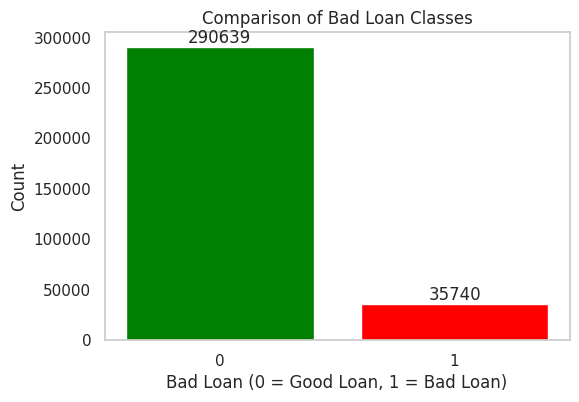

In [59]:
# Counting occurrences of each class
bad_loan_counts = y_train.value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(bad_loan_counts.index.astype(str), bad_loan_counts.values, color=['green', 'red'])

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=12)

# Chart labels and title
plt.xlabel("Bad Loan (0 = Good Loan, 1 = Bad Loan)")
plt.ylabel("Count")
plt.title("Comparison of Bad Loan Classes")
plt.xticks(rotation=0)

# Show plot
plt.show()

Terjadi class imbalance, sehingga dibutuhkan pendekatan untuk membuat dataset memiliki class yang balance. Pendekatan yang digunakan adalah oversampling

# Oversampling Minority Class to Resolve Class Imbalance

In [60]:
#import libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

#dealing with imbalanced data
smote = SMOTE(random_state=42)
X_train_o, y_train_o = smote.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

,count
bad_loan,
0,290639
1,290639


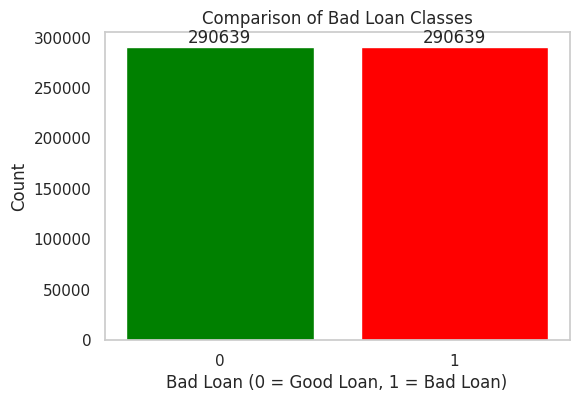

In [61]:
# Counting occurrences of each class
bad_loan_counts = y_train_o.value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(bad_loan_counts.index.astype(str), bad_loan_counts.values, color=['green', 'red'])

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=12)

# Chart labels and title
plt.xlabel("Bad Loan (0 = Good Loan, 1 = Bad Loan)")
plt.ylabel("Count")
plt.title("Comparison of Bad Loan Classes")
plt.xticks(rotation=0)

# Show plot
plt.show()

# Building Model

In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score)
import xgboost as xgb
import lightgbm as lgb


# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"\nCross-Validation ROC AUC Scores: {cv_scores}")
    print(f"Mean CV ROC AUC: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")

    return model, y_pred, y_prob, auc_score

## Logistic Regression


===== Logistic Regression =====

Logistic Regression Results:
Accuracy: 0.5295
Precision: 0.1504
Recall: 0.7151
F1 Score: 0.2486
AUC Score: 0.6528


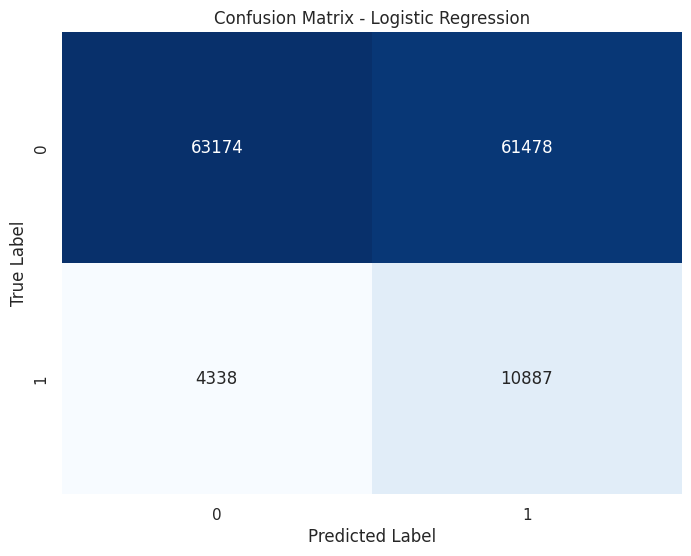


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.51      0.66    124652
           1       0.15      0.72      0.25     15225

    accuracy                           0.53    139877
   macro avg       0.54      0.61      0.45    139877
weighted avg       0.85      0.53      0.61    139877



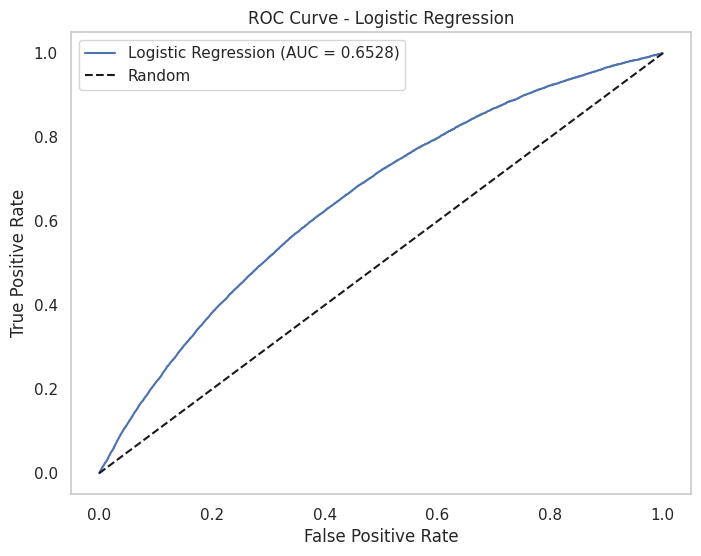

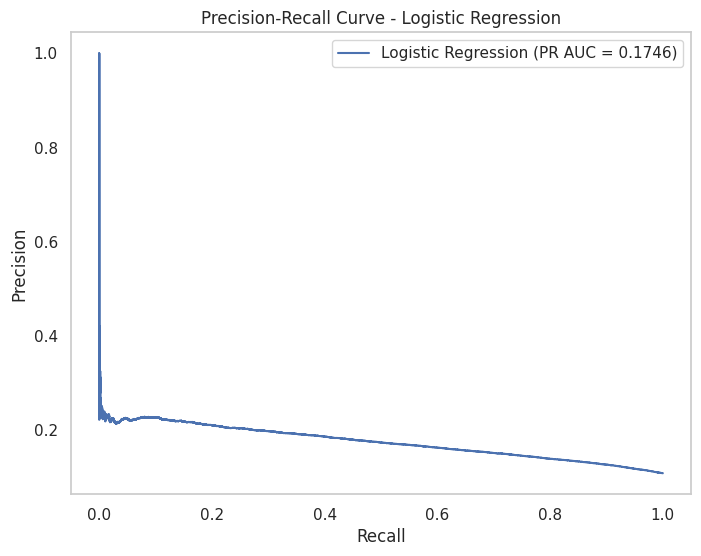


Cross-Validation ROC AUC Scores: [0.6553535  0.64666074 0.65687211 0.6579035  0.65717038]
Mean CV ROC AUC: 0.6548
Standard Deviation: 0.0041


In [62]:
print("\n===== Logistic Regression =====")
# Instantiate the Logistic Regression model with default hyperparameters
lr_model = LogisticRegression(random_state=42)
# Fit the model and evaluate it using the provided evaluation function
lr_model, lr_pred, lr_prob, lr_auc = evaluate_model(lr_model, X_train_o, y_train_o, X_test, y_test, "Logistic Regression")


## Random Forest


===== Random Forest =====

Random Forest Results:
Accuracy: 0.8882
Precision: 0.2764
Recall: 0.0170
F1 Score: 0.0321
AUC Score: 0.6470


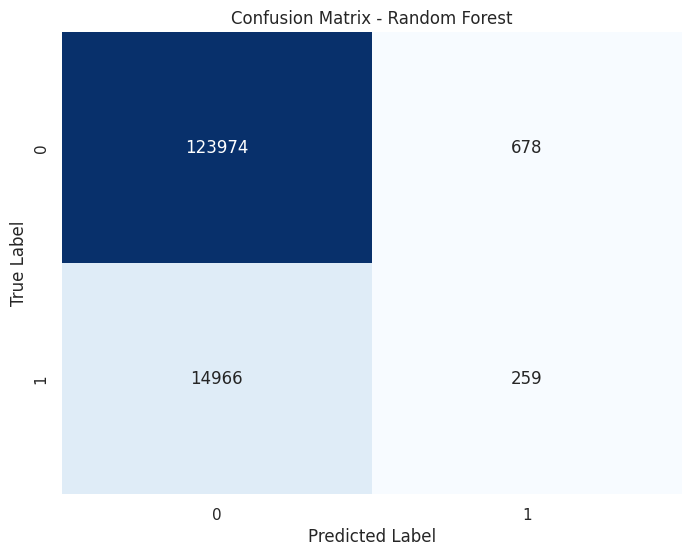


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    124652
           1       0.28      0.02      0.03     15225

    accuracy                           0.89    139877
   macro avg       0.58      0.51      0.49    139877
weighted avg       0.83      0.89      0.84    139877



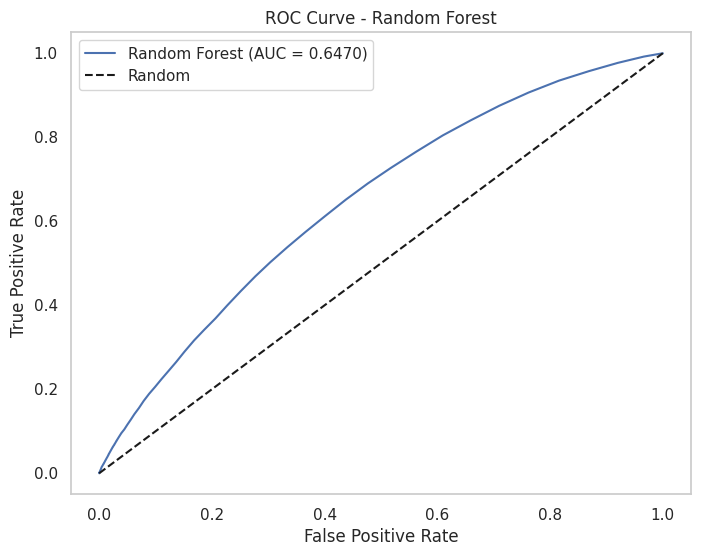

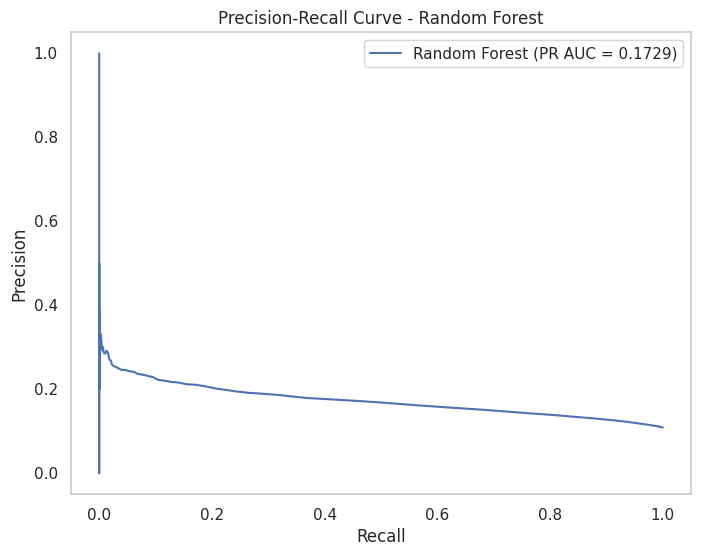


Cross-Validation ROC AUC Scores: [0.9614657  0.96173611 0.96124929 0.96109205 0.96115655]
Mean CV ROC AUC: 0.9613
Standard Deviation: 0.0002


In [63]:
print("\n===== Random Forest =====")
# Instantiate the Random Forest model with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)
# Fit the model and evaluate it using the provided evaluation function
rf_model, rf_pred, rf_prob, rf_auc = evaluate_model(rf_model, X_train_o, y_train_o, X_test, y_test, "Random Forest")


## XGBoost


===== XGBoost =====

XGBoost Results:
Accuracy: 0.8907
Precision: 0.3816
Recall: 0.0071
F1 Score: 0.0139
AUC Score: 0.6803


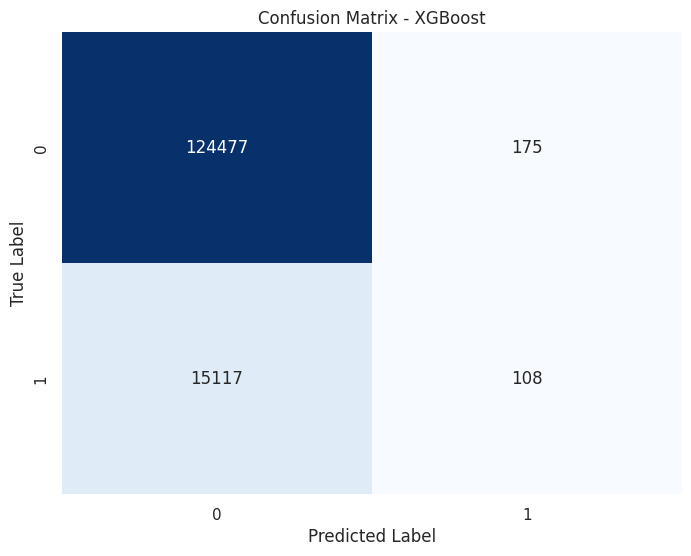


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124652
           1       0.38      0.01      0.01     15225

    accuracy                           0.89    139877
   macro avg       0.64      0.50      0.48    139877
weighted avg       0.84      0.89      0.84    139877



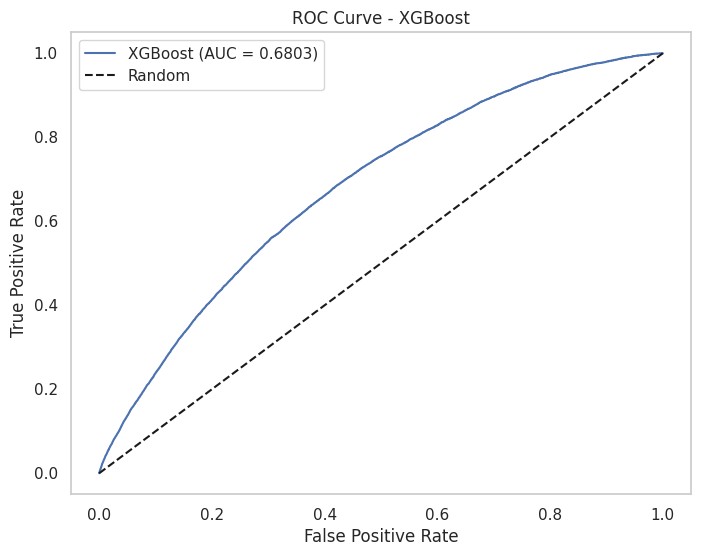

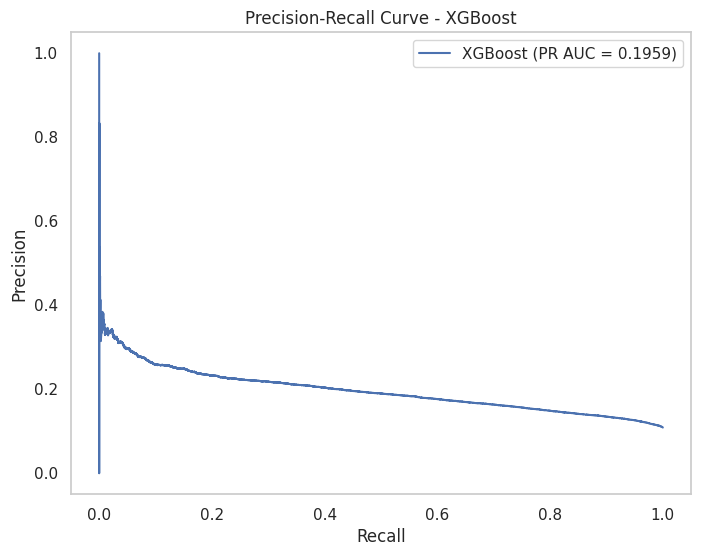


Cross-Validation ROC AUC Scores: [0.95571579 0.95621523 0.9561113  0.9554776  0.95510736]
Mean CV ROC AUC: 0.9557
Standard Deviation: 0.0004


In [64]:
print("\n===== XGBoost =====")
# Instantiate the XGBoost model with default hyperparameters
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
# Fit the model and evaluate it using the provided evaluation function
xgb_model, xgb_pred, xgb_prob, xgb_auc = evaluate_model(xgb_model, X_train_o, y_train_o, X_test, y_test, "XGBoost")


## Gradient Boosting


===== Gradient Boosting =====

Gradient Boosting Results:
Accuracy: 0.8910
Precision: 0.3878
Recall: 0.0025
F1 Score: 0.0050
AUC Score: 0.6771


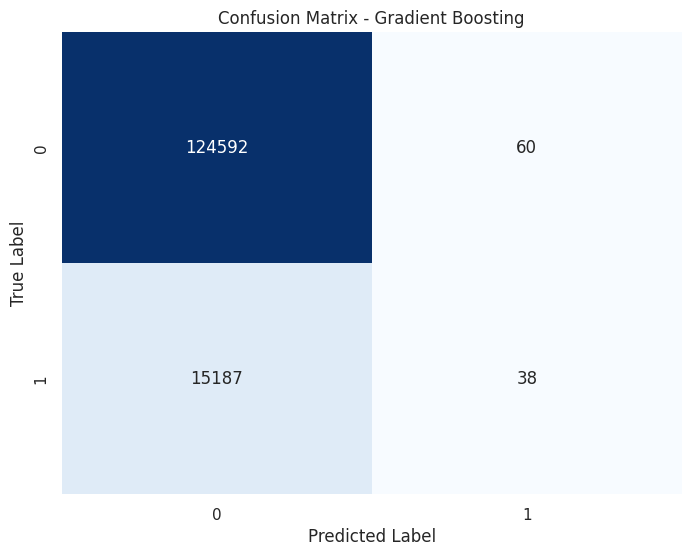


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124652
           1       0.39      0.00      0.00     15225

    accuracy                           0.89    139877
   macro avg       0.64      0.50      0.47    139877
weighted avg       0.84      0.89      0.84    139877



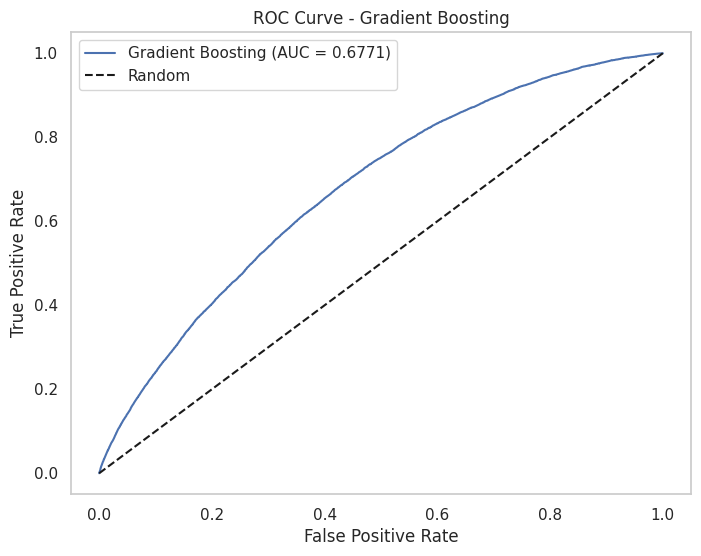

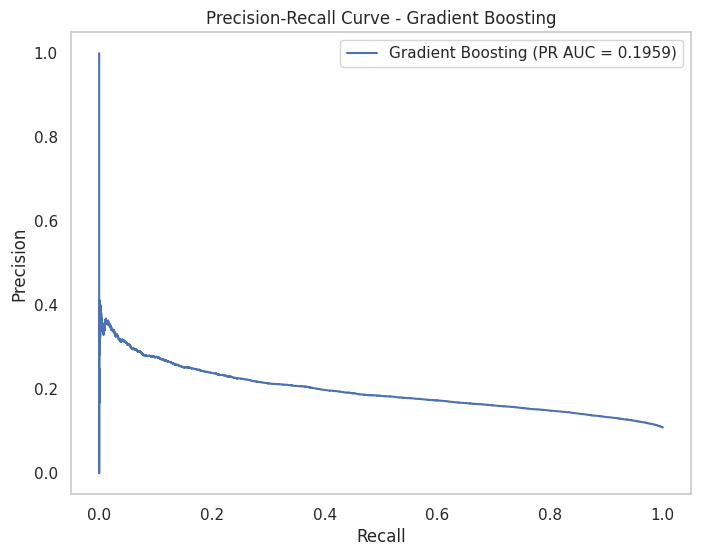


Cross-Validation ROC AUC Scores: [0.95117933 0.95226266 0.95147345 0.95133768 0.95116729]
Mean CV ROC AUC: 0.9515
Standard Deviation: 0.0004


In [65]:
print("\n===== Gradient Boosting =====")
# Instantiate the Gradient Boosting model with default hyperparameters
gb_model = GradientBoostingClassifier(random_state=42)
# Fit the model and evaluate it using the provided evaluation function
gb_model, gb_pred, gb_prob, gb_auc = evaluate_model(gb_model, X_train_o, y_train_o, X_test, y_test, "Gradient Boosting")


## LightGBM


===== LightGBM =====
[LightGBM] [Info] Number of positive: 290639, number of negative: 290639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 581278, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Accuracy: 0.8910
Precision: 0.3571
Recall: 0.0016
F1 Score: 0.0033
AUC Score: 0.6860


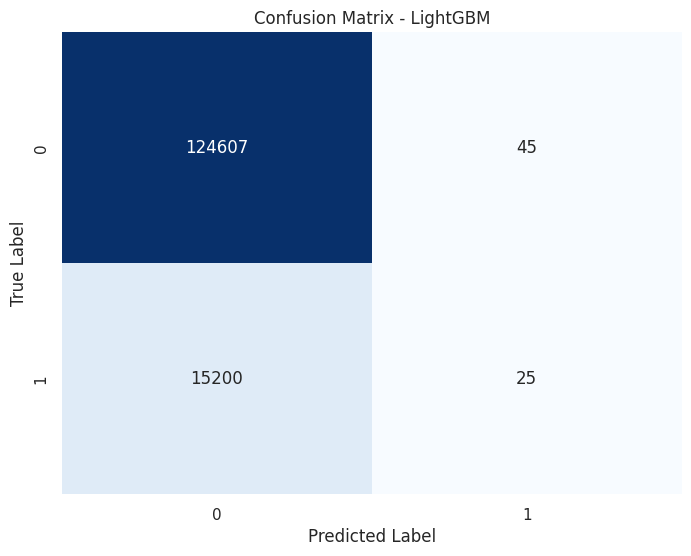


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124652
           1       0.36      0.00      0.00     15225

    accuracy                           0.89    139877
   macro avg       0.62      0.50      0.47    139877
weighted avg       0.83      0.89      0.84    139877



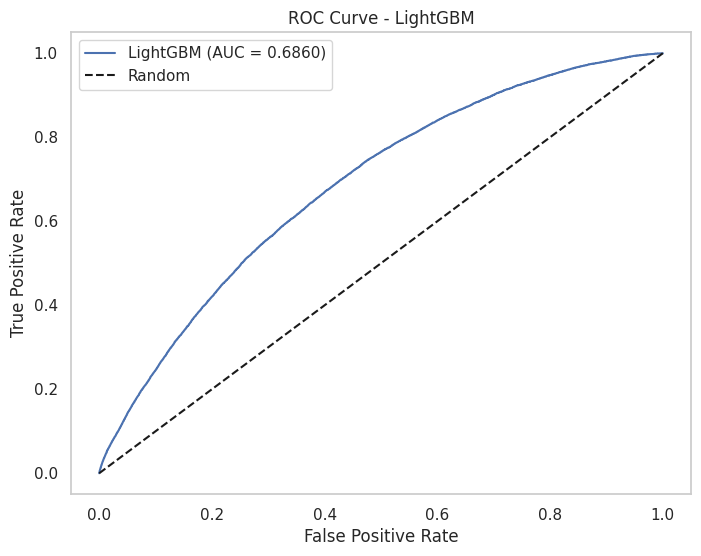

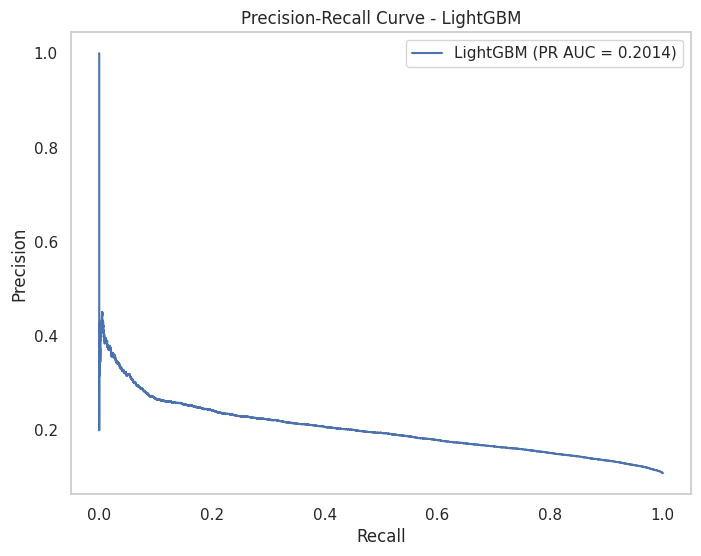

[LightGBM] [Info] Number of positive: 232511, number of negative: 232511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 465022, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 232511, number of negative: 232511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 465022, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initsco

In [66]:
print("\n===== LightGBM =====")
# Instantiate the LightGBM model with default hyperparameters
lgbm_model = lgb.LGBMClassifier(random_state=42)
# Fit the model and evaluate it using the provided evaluation function
lgbm_model, lgbm_pred, lgbm_prob, lgbm_auc = evaluate_model(lgbm_model, X_train_o, y_train_o, X_test, y_test, "LightGBM")


# Compare Model

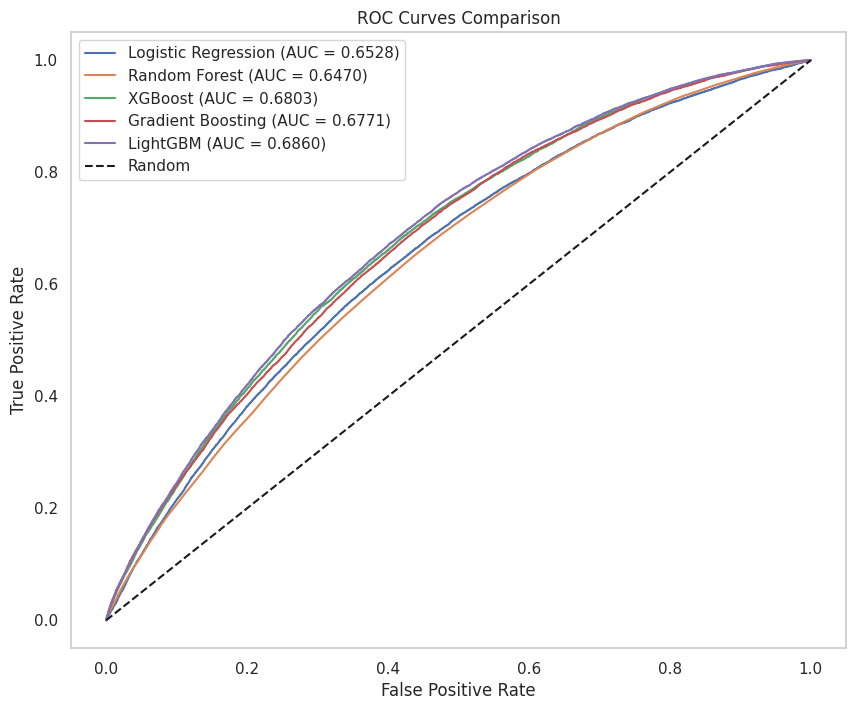


===== Model Comparison =====
                 Model       AUC  Accuracy  Precision    Recall  F1 Score
4             LightGBM  0.685991  0.891011   0.357143  0.001642  0.003269
2              XGBoost  0.680331  0.890675   0.381625  0.007094  0.013928
3    Gradient Boosting  0.677127  0.890997   0.387755  0.002496  0.004960
0  Logistic Regression  0.652826  0.529472   0.150446  0.715074  0.248590
1        Random Forest  0.647010  0.888159   0.276414  0.017011  0.032050


In [67]:
# Compare all models in a single ROC curve
plt.figure(figsize=(10, 8))
# Plot ROC curves for all models
models = {
    "Logistic Regression": (lr_model, lr_prob, lr_auc),
    "Random Forest": (rf_model, rf_prob, rf_auc),
    "XGBoost": (xgb_model, xgb_prob, xgb_auc),
    "Gradient Boosting": (gb_model, gb_prob, gb_auc),
    "LightGBM": (lgbm_model, lgbm_prob, lgbm_auc)
}

for name, (model, y_prob, auc_score) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# Create a summary table of performance metrics
results = pd.DataFrame({
    'Model': list(models.keys()),
    'AUC': [models[name][2] for name in models.keys()],
    'Accuracy': [accuracy_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()],
    'Precision': [precision_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()],
    'Recall': [recall_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()],
    'F1 Score': [f1_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()]
})

print("\n===== Model Comparison =====")
print(results.sort_values('AUC', ascending=False))

In [68]:
# Create a summary table of performance metrics
results = pd.DataFrame({
    'Model': list(models.keys()),
    'AUC': [models[name][2] for name in models.keys()],
    'Accuracy': [accuracy_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()],
    'Precision': [precision_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()],
    'Recall': [recall_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()],
    'F1 Score': [f1_score(y_test, model.predict(X_test)) for name, (model, _, _) in models.items()]
})

# Fungsi untuk menyorot (highlight) baris dengan akurasi tertinggi
def highlight_max_row(row):
    # Cek apakah baris ini adalah baris dengan nilai Accuracy tertinggi
    if row['Accuracy'] == results['Accuracy'].max():
        return ['background-color: yellow'] * len(row)
    else:
        return [''] * len(row)

# Terapkan style pada DataFrame dan tampilkan hasilnya
styled_results = results.sort_values('AUC', ascending=False).style.apply(highlight_max_row, axis=1)
display(styled_results)

print("\n===== Model Comparison =====")
print(results.sort_values('AUC', ascending=False))

,Model,AUC,Accuracy,Precision,Recall,F1 Score
4,LightGBM,0.685991,0.891011,0.357143,0.001642,0.003269
2,XGBoost,0.680331,0.890675,0.381625,0.007094,0.013928
3,Gradient Boosting,0.677127,0.890997,0.387755,0.002496,0.004960
0,Logistic Regression,0.652826,0.529472,0.150446,0.715074,0.248590
1,Random Forest,0.647010,0.888159,0.276414,0.017011,0.032050



===== Model Comparison =====
                 Model       AUC  Accuracy  Precision    Recall  F1 Score
4             LightGBM  0.685991  0.891011   0.357143  0.001642  0.003269
2              XGBoost  0.680331  0.890675   0.381625  0.007094  0.013928
3    Gradient Boosting  0.677127  0.890997   0.387755  0.002496  0.004960
0  Logistic Regression  0.652826  0.529472   0.150446  0.715074  0.248590
1        Random Forest  0.647010  0.888159   0.276414  0.017011  0.032050


#Save each Model to Pickle

In [69]:
import pickle

# Menyimpan Logistic Regression model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Menyimpan Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Menyimpan XGBoost model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Menyimpan Gradient Boosting model
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

# Menyimpan LightGBM model
with open('lgbm_model.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)
